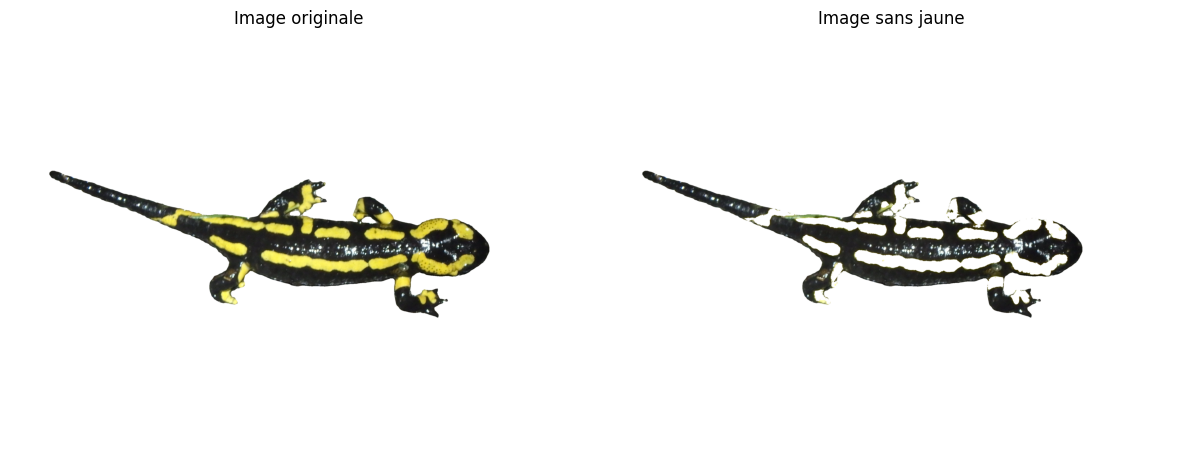

L'image sans jaune a été sauvegardée à : ./jaune/jaune_a3.4.jpg


In [5]:
# Importation des bibliothèques nécessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour retirer la couleur jaune
def remove_yellow(image_path, output_path):
    # Lire l'image
    img = cv2.imread(image_path)
    
    # Convertir l'image de BGR à HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Définir la plage de couleur jaune en HSV
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    
    # Créer un masque pour la couleur jaune
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    # Inverser le masque
    mask_inv = cv2.bitwise_not(mask)
    
    # Appliquer le masque inversé à l'image originale
    result = cv2.bitwise_and(img, img, mask=mask_inv)
    
    # Remplacer les pixels jaunes par du blanc (ou une autre couleur de votre choix)
    result[mask != 0] = [255, 255, 255]  # Blanc
    
    # Sauvegarder le résultat
    cv2.imwrite(output_path, result)
    
    return result

# Chemin de l'image d'entrée (à modifier selon votre cas)
input_image_path = '/Users/firmin/Desktop/Dev/TFE/tfe_code/image_processing/segmented_salamander_a3.3.png'

# Chemin pour sauvegarder l'image de sortie
output_image_path = './jaune/jaune_a3.4.jpg'

# Appeler la fonction pour retirer le jaune
result_image = remove_yellow(input_image_path, output_image_path)

# Afficher les images originale et résultante
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(cv2.imread(input_image_path), cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Image sans jaune')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"L'image sans jaune a été sauvegardée à : {output_image_path}")